<a href="https://colab.research.google.com/github/charanjvs/HR_Analysis/blob/main/HR_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# performing linear algebra
import numpy as np

# data processing
import pandas as pd

# visualisation
import matplotlib.pyplot as plt
#import seaborn as sns % matplotlib inline
import seaborn as sns
%matplotlib inline


In [ ]:
dataset = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
print (dataset.head)

<bound method NDFrame.head of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationFi

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

<Axes: >

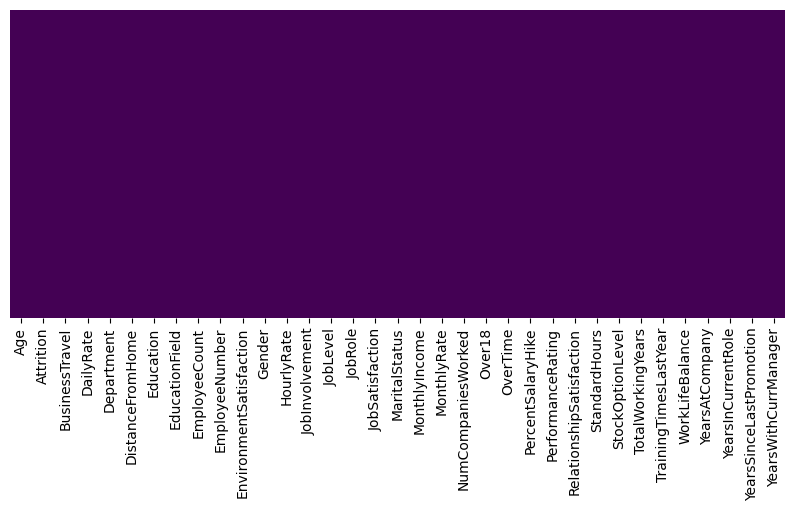

In [ ]:
# heatmap to check the missing value
plt.figure(figsize =(10, 4))
sns.heatmap(dataset.isnull(),
			yticklabels = False,
			cbar = False,
			cmap ='viridis')

<Axes: xlabel='Attrition', ylabel='count'>

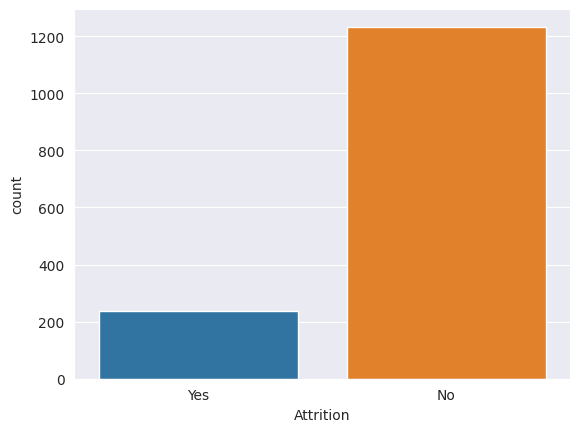

In [ ]:
sns.set_style('darkgrid')
sns.countplot(x ='Attrition',
			data = dataset)

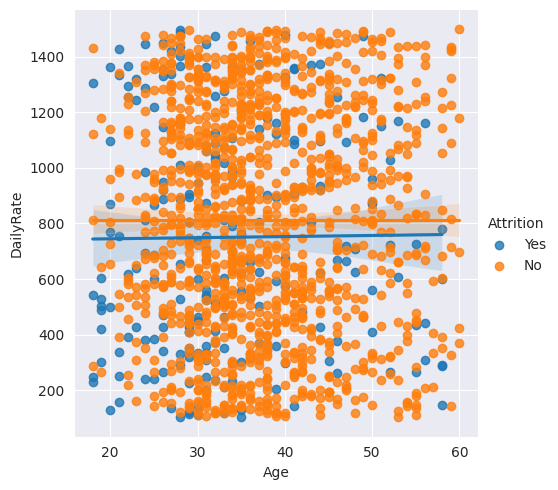

In [ ]:
sns.lmplot(x = 'Age',
		y = 'DailyRate',
		hue = 'Attrition',
		data = dataset)

<Axes: xlabel='Attrition', ylabel='MonthlyIncome'>

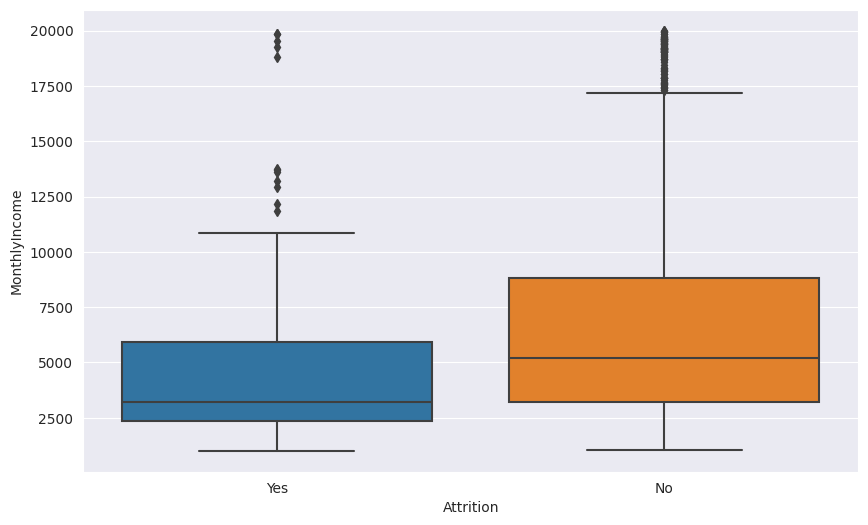

In [ ]:
plt.figure(figsize =(10, 6))
sns.boxplot(y ='MonthlyIncome',
			x ='Attrition',
			data = dataset)

In [ ]:
dataset.drop('EmployeeCount',
			axis = 1,
			inplace = True)
dataset.drop('StandardHours',
			axis = 1,
			inplace = True)
dataset.drop('EmployeeNumber',
			axis = 1,
			inplace = True)
dataset.drop('Over18',
			axis = 1,
			inplace = True)

print(dataset.shape)

(1470, 31)


In [ ]:
y = dataset.iloc[:, 1]

In [ ]:
X = dataset

In [ ]:
X.drop('Attrition',
	axis = 1,
	inplace = True)

In [ ]:
print(X.columns)

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y = lb.fit_transform(y)

In [ ]:
dum_BusinessTravel = pd.get_dummies(dataset['BusinessTravel'],
									prefix ='BusinessTravel')

dum_Department = pd.get_dummies(dataset['Department'],
								prefix ='Department')

dum_EducationField = pd.get_dummies(dataset['EducationField'],
								prefix ='EducationField')

dum_Gender = pd.get_dummies(dataset['Gender'],
						prefix ='Gender', drop_first = True)

dum_JobRole = pd.get_dummies(dataset['JobRole'],

							prefix ='JobRole')

dum_MaritalStatus = pd.get_dummies(dataset['MaritalStatus'],

								prefix ='MaritalStatus')

dum_OverTime = pd.get_dummies(dataset['OverTime'],
							prefix ='OverTime', drop_first = True)

# Adding these dummy variable to input X
X = pd.concat([X, dum_BusinessTravel, dum_Department,
			dum_EducationField, dum_Gender, dum_JobRole,
			dum_MaritalStatus, dum_OverTime], axis = 1)

# Removing the categorical data
X.drop(['BusinessTravel', 'Department', 'EducationField',
	'Gender', 'JobRole', 'MaritalStatus', 'OverTime'],
	axis = 1, inplace = True)

print(X.shape)
print(y.shape)

(1470, 49)
(1470,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(

X, y, test_size = 0.25, random_state = 40)

In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10,
							criterion='entropy')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

def print_score(clf, X_train, y_train,
				X_test, y_test,
				train=True):

	if train:
		print("Train Result:")
		print("------------")
		print("Classification Report: \n {}\n".format(classification_report(
			y_train, clf.predict(X_train))))

		print("Confusion Matrix: \n {}\n".format(confusion_matrix(
			y_train, clf.predict(X_train))))

		res = cross_val_score(clf, X_train, y_train,
							cv=10, scoring='accuracy')

		print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
		print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
		print("----------------------------------------------------------")

	elif train == False:

		print("Test Result:")
		print("-----------")
		print("Classification Report: \n {}\n".format(
			classification_report(y_test, clf.predict(X_test))))

		print("Confusion Matrix: \n {}\n".format(
			confusion_matrix(y_test, clf.predict(X_test))))

		print("accuracy score: {0:.4f}\n".format(
			accuracy_score(y_test, clf.predict(X_test))))

		print("-----------------------------------------------------------")

print_score(rf, X_train, y_train,
			X_test, y_test,
			train=True)

print_score(rf, X_train, y_train,
			X_test, y_test,
			train=False)

Train Result:
------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       922
           1       1.00      0.93      0.96       180

    accuracy                           0.99      1102
   macro avg       0.99      0.96      0.98      1102
weighted avg       0.99      0.99      0.99      1102


Confusion Matrix: 
 [[922   0]
 [ 13 167]]

Average Accuracy: 	 0.8430
Accuracy SD: 		 0.0151
----------------------------------------------------------
Test Result:
-----------
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       311
           1       0.91      0.18      0.29        57

    accuracy                           0.87       368
   macro avg       0.89      0.59      0.61       368
weighted avg       0.87      0.87      0.83       368


Confusion Matrix: 
 [[310   1]
 [ 47  10]]

accuracy score: 0.8696

---------------------

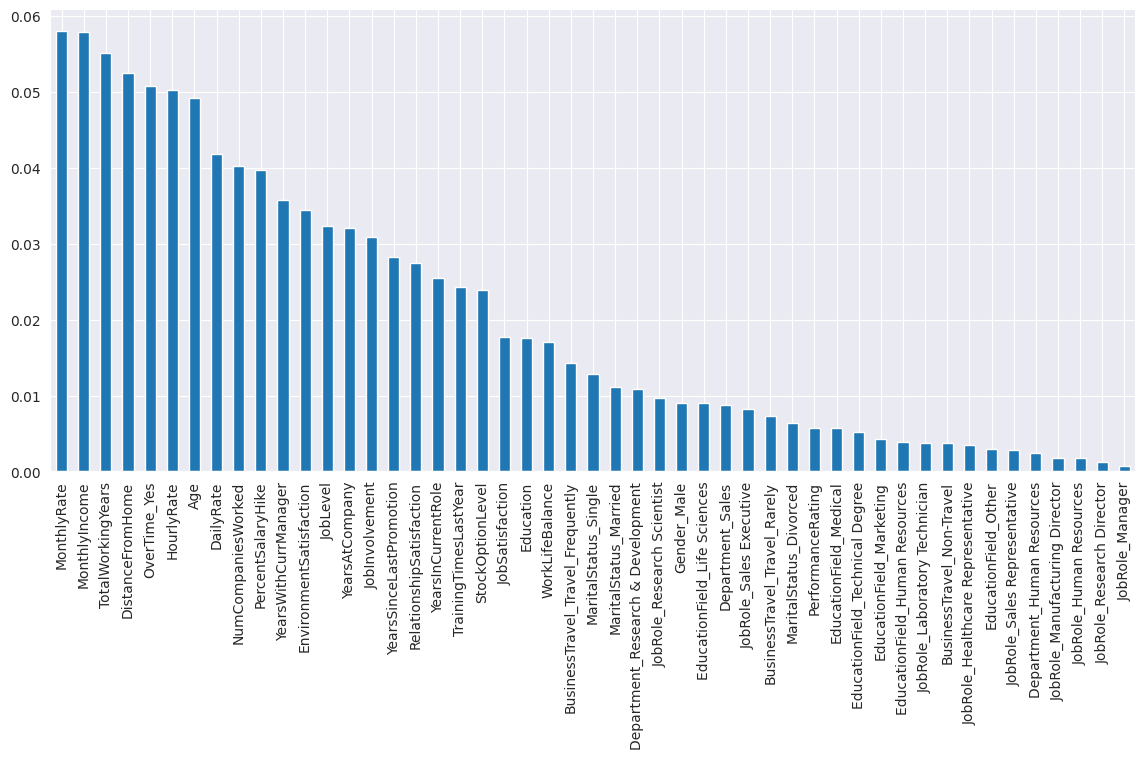

In [ ]:
pd.Series(rf.feature_importances_,
		index = X.columns).sort_values(ascending = False).plot(kind = 'bar',
																figsize = (14,6));